# Car Price Prediction

In this notebook we will analyze the cars dataset (from kaggle) and try to see if we can find any connections between the features of the cars to their price.  

We will follow these steps in order to predict the price of a given car:
<ol>
    <li>Data exploration and understanding</li>
    <li>Data cleansing</li>
    <li>Feature Selection</li>
    <li>Traing Linear Regression model</li>
    <li>Evaluating the model</li>
    <li>Conclusion and future steps</li>
</ol>

In [368]:
import pandas as pd
import numpy as np

In [369]:
cars = pd.read_csv('./data/cars.csv')

## First exploration of the dataset

In [370]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [371]:
cars.shape

(205, 26)

In [372]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [373]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [374]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [375]:
cars.isnull().any().any()

False

### Transforming the CarName column

In [376]:
cars['CarName'] = cars['CarName'].apply(lambda x: x.split()[0])

In [377]:
cars.rename(columns={"CarName": "Company"}, inplace=True)

In [378]:
cars.head()

,car_ID,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [379]:
cars['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Fixing companies names

In [380]:
cars['Company'].replace('maxda', 'mazda', inplace=True)
cars['Company'].replace('porcshce', 'porsche', inplace=True)
cars['Company'].replace('Nissan', 'nissan', inplace=True)
cars['Company'].replace('toyouta', 'toyota', inplace=True)
cars['Company'].replace('vokswagen', 'volkswagen', inplace=True)
cars['Company'].replace('vw', 'volkswagen', inplace=True)

## Exploration of our target, the price 

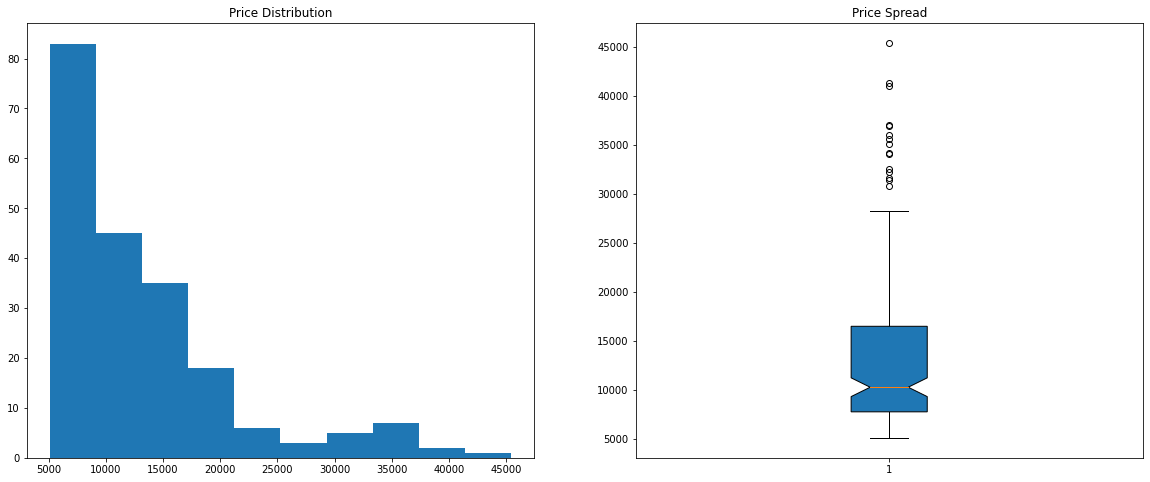

In [381]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Price Distribution')
plt.hist(cars['price'])

plt.subplot(1,2,2)
plt.title('Price Spread')
plt.boxplot(cars['price'], notch=True, patch_artist=True)

plt.show()

We can see from the distribution chart (on the left) that most of our prices are between 5000 and about 18,000, from the price spread chart (on the right) we can see that our median is around 10,000.  

**Our dataset is skewed so we will have high variance in our prices.**

Looking at the `describe()` method with more percentiles:

In [382]:
cars.describe(percentiles=[0, 0.25, 0.5, 0.75, 0.85, 0.9, 0.95 , 1])['price']

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
0%        5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
95%      32472.400000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

Most of our car prices are as expected, below 18,500.

## Visualize features

In [383]:
import matplotlib.pyplot as plt
import seaborn as sns

In [384]:
cars.columns

Index(['car_ID', 'symboling', 'Company', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Company feature

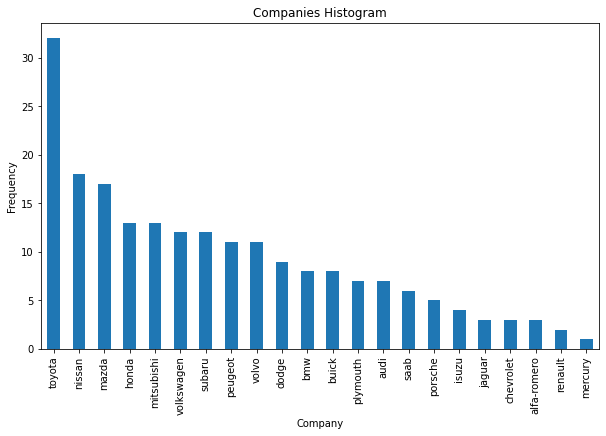

In [385]:
plt.figure(figsize=(10,6))

plt_comp = cars['Company'].value_counts().plot(kind='bar')
plt_comp.set_xlabel('Company')
plt_comp.set_ylabel('Frequency')
plt_comp.set_title('Companies Histogram')
plt.show()

Most of our cars are **toyota**

**Company vs Average price**

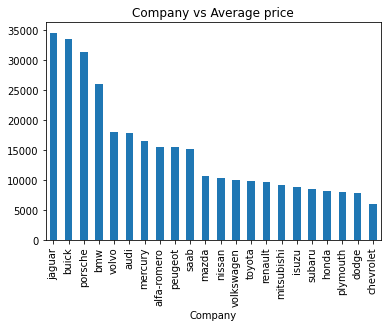

In [386]:
cars.groupby("Company")['price'].agg('mean').sort_values(ascending=False).plot(kind='bar')
plt.title("Company vs Average price")
plt.show()

**Jaguar** has the highest average car price of all companies

### Fuel Type feature

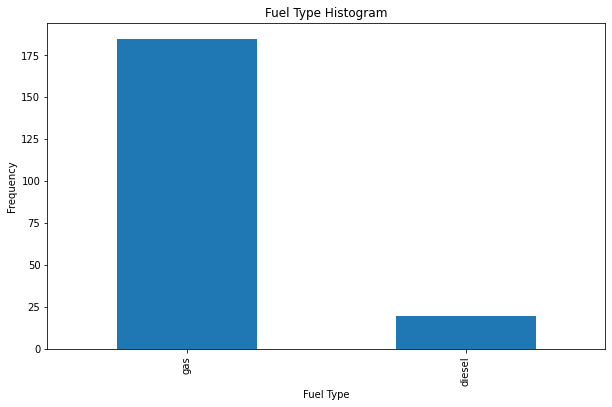

In [387]:
plt.figure(figsize=(10,6))

plt_comp = cars['fueltype'].value_counts().plot(kind='bar')
plt_comp.set_xlabel('Fuel Type')
plt_comp.set_ylabel('Frequency')
plt_comp.set_title('Fuel Type Histogram')
plt.show()

**Gas** is most used as fuel type

**Fuel Type vs Average Price**

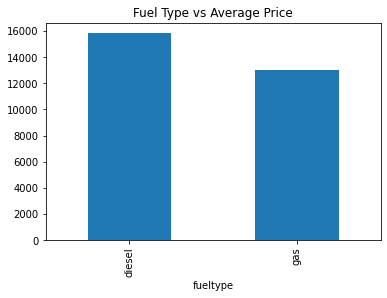

In [388]:
cars.groupby("fueltype")['price'].agg('mean').sort_values(ascending=False).plot(kind='bar')
plt.title('Fuel Type vs Average Price')
plt.show()

**diesel** fuel type has car price average higher than gas

### Car Body feature

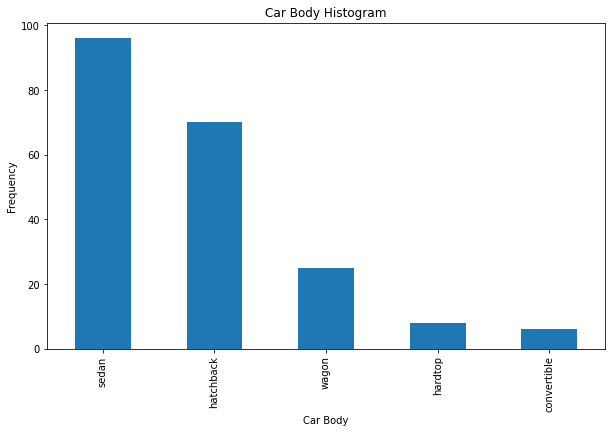

In [350]:
plt.figure(figsize=(10,6))

plt_comp = cars['carbody'].value_counts().plot(kind='bar')
plt_comp.set_xlabel('Car Body')
plt_comp.set_ylabel('Frequency')
plt_comp.set_title('Car Body Histogram')
plt.show()

Most of our drivers likes **sedan** car body

**Car Body vs Average Price**

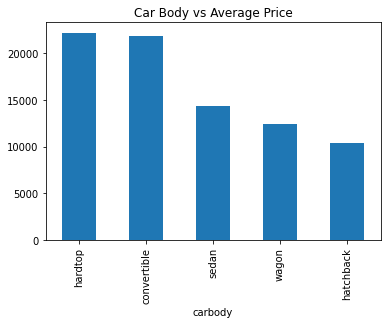

In [389]:
cars.groupby("carbody")['price'].agg('mean').sort_values(ascending=False).plot(kind='bar')
plt.title("Car Body vs Average Price")
plt.show()

**hardtop and convertible** are the highiest Car Type

## Engine Type feature

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Engine Type Count'}, xlabel='enginetype', ylabel='count'>

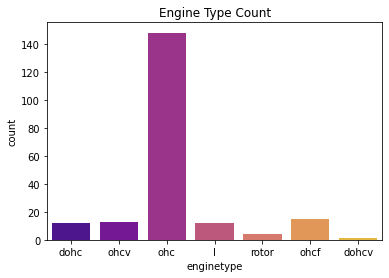

In [411]:
plt.title("Engine Type Count")
sns.countplot(cars['enginetype'], palette=('plasma'))

**Engine Type vs Price**

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Engine Type vs Price'}, xlabel='enginetype', ylabel='price'>

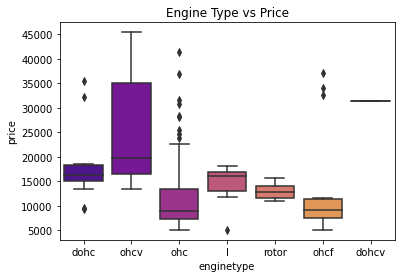

In [412]:
plt.title("Engine Type vs Price")
sns.boxplot(cars['enginetype'], cars['price'], palette=('plasma'))

We can see that the favourite engine type is **ohc**

## Number of Doors feature

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Door Number'}, xlabel='doornumber', ylabel='count'>

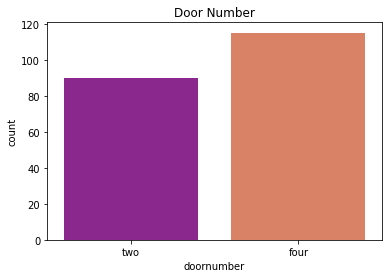

In [391]:
plt.title('Door Number')
sns.countplot(cars['doornumber'], palette=('plasma'))

**Number of Doors vs Price**

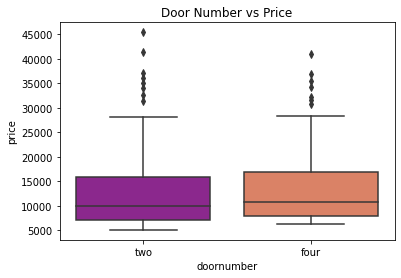

In [393]:
plt.title("Door Number vs Price")
sns.boxplot(x=cars['doornumber'], y=cars['price'], palette=('plasma'))
plt.show()

**We can see that there is no sugnificant difference, hence we will not take this feature into account**

## Cylinder Number feature

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


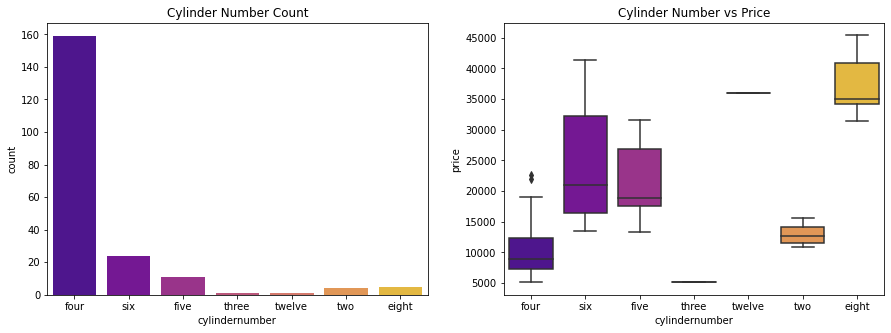

In [400]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Cylinder Number Count")
sns.countplot(cars['cylindernumber'], palette=('plasma'))

plt.subplot(1,2,2)
plt.title("Cylinder Number vs Price")
sns.boxplot(x=cars['cylindernumber'], y=cars['price'], palette=('plasma'))

plt.show()

From the count plot we can see that **four cylinders are most common** but from the right box plot it seems that the **eight cylinders has the highiest price range**

## Car Measurements features

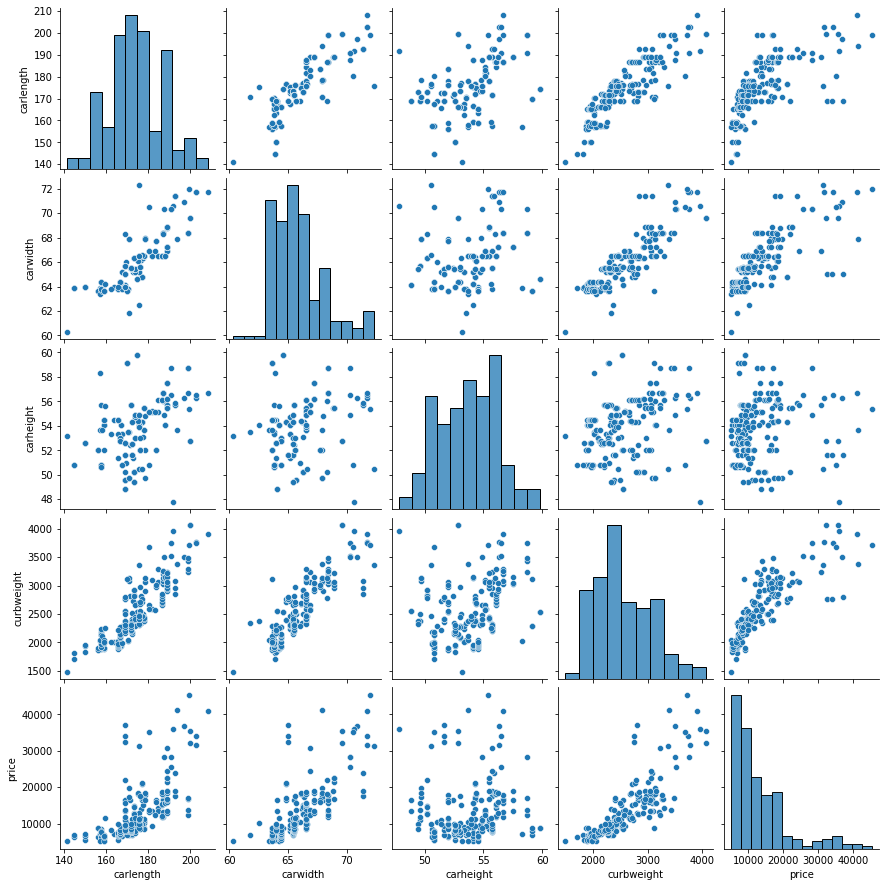

In [405]:
sns.pairplot(cars[['carlength', 'carwidth', 'carheight', 'curbweight', 'price']])

**Looking at the price column we can see that `carlength`, `carwidth`, `curbweight` are correlated with the price**

## Take a look at the other numerical features

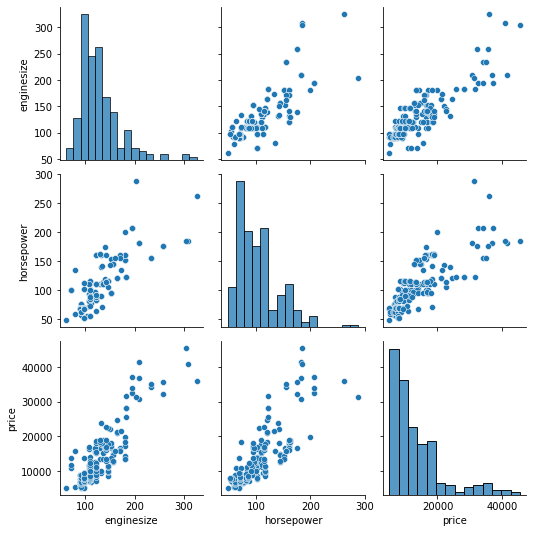

In [408]:
sns.pairplot(cars[['enginesize', 'horsepower', 'price']])

The **enginesize and horsepower** are correlated with the **price**

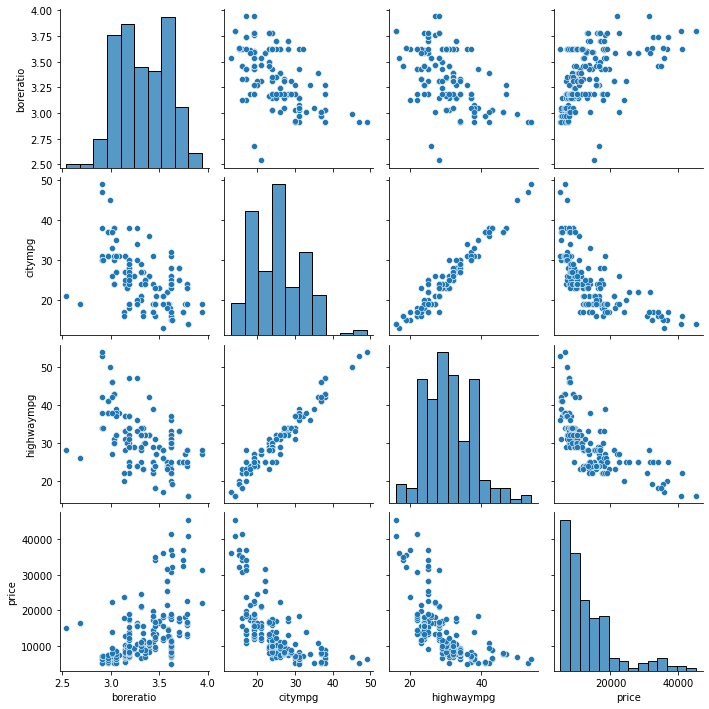

In [410]:
sns.pairplot(cars[['boreratio', 'citympg', 'highwaympg', 'price']])

We can see that the **highwaympg and citympg** have **negative correlation** with price.  
The **boreratio** is not so much correlated.

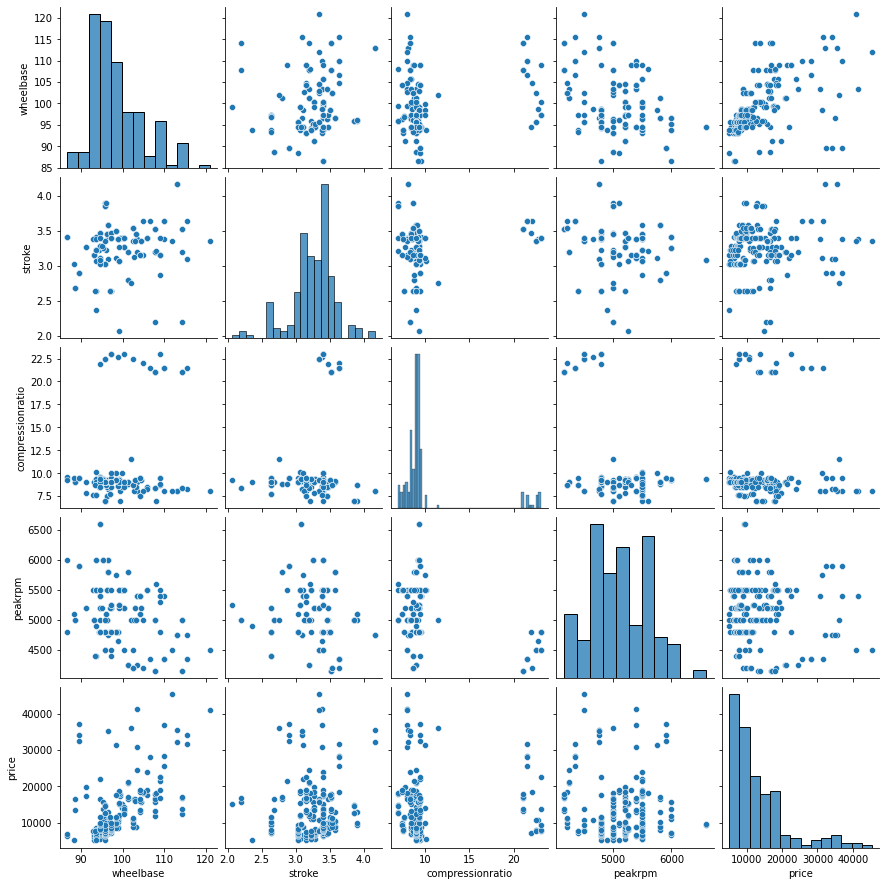

In [409]:
sns.pairplot(cars[['wheelbase', 'stroke', 'compressionratio', 'peakrpm', 'price']])

Looking at the price column we can see that no other feature is correlated with the price

## Summing up the features we will consider

The features we will consider are:
<ol>
    <li>fueltype</li>
    <li>carbody</li>
    <li>enginesize</li>
    <li>horsepower</li>
    <li>cylindernumber</li>
    <li>carlength</li>
    <li>carwidth</li>
    <li>curbweight</li>
    <li>enginetype</li>
    <li><b>Target: Price</li>
</ol>

In [415]:
cars_df = cars[['fueltype', 'carbody', 'enginesize', 'horsepower', 
                'cylindernumber', 'carlength', 'carwidth', 'curbweight', 'enginetype', 'price']]

**Transform the columns using one hot encoding**

In [416]:
def transform_column(_cars, columns_names):
    for column_name in columns_names:
        temp = pd.get_dummies(_cars[column_name], drop_first = True)
        _cars = pd.concat([_cars, temp], axis = 1)
        _cars.drop([column_name], axis = 1, inplace = True)
    return _cars

In [417]:
cars_df = transform_column(cars_df, ['fueltype', 'carbody', 'cylindernumber', 'enginetype'])

In [419]:
cars_df.head()

,enginesize,horsepower,carlength,carwidth,curbweight,price,gas,hardtop,hatchback,sedan,...,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor
0,130,111,168.8,64.1,2548,13495.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,130,111,168.8,64.1,2548,16500.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,152,154,171.2,65.5,2823,16500.0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,109,102,176.6,66.2,2337,13950.0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,136,115,176.6,66.4,2824,17450.0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [420]:
cars_df.shape

(205, 23)

We have new dataset with 23 features

In [421]:
cars_df.columns

Index(['enginesize', 'horsepower', 'carlength', 'carwidth', 'curbweight',
       'price', 'gas', 'hardtop', 'hatchback', 'sedan', 'wagon', 'five',
       'four', 'six', 'three', 'twelve', 'two', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor'],
      dtype='object')

## Scaling the data and find Correlation

Before checking for correlation we will scale the data in order to try and reduce more features using a heatmap:

In [422]:
from sklearn.preprocessing import MinMaxScaler

columns_to_norm = ['enginesize', 'horsepower', 'carlength', 'carwidth', 'curbweight', 'price']
cars_df[columns_to_norm] = scaler.fit_transform(cars_df[columns_to_norm])
cars_df.head()

,enginesize,horsepower,carlength,carwidth,curbweight,price,gas,hardtop,hatchback,sedan,...,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.260377,0.262500,0.413433,0.316667,0.411171,0.207959,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.260377,0.262500,0.413433,0.316667,0.411171,0.282558,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.343396,0.441667,0.449254,0.433333,0.517843,0.282558,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,0.181132,0.225000,0.529851,0.491667,0.329325,0.219254,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.283019,0.279167,0.529851,0.508333,0.518231,0.306142,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

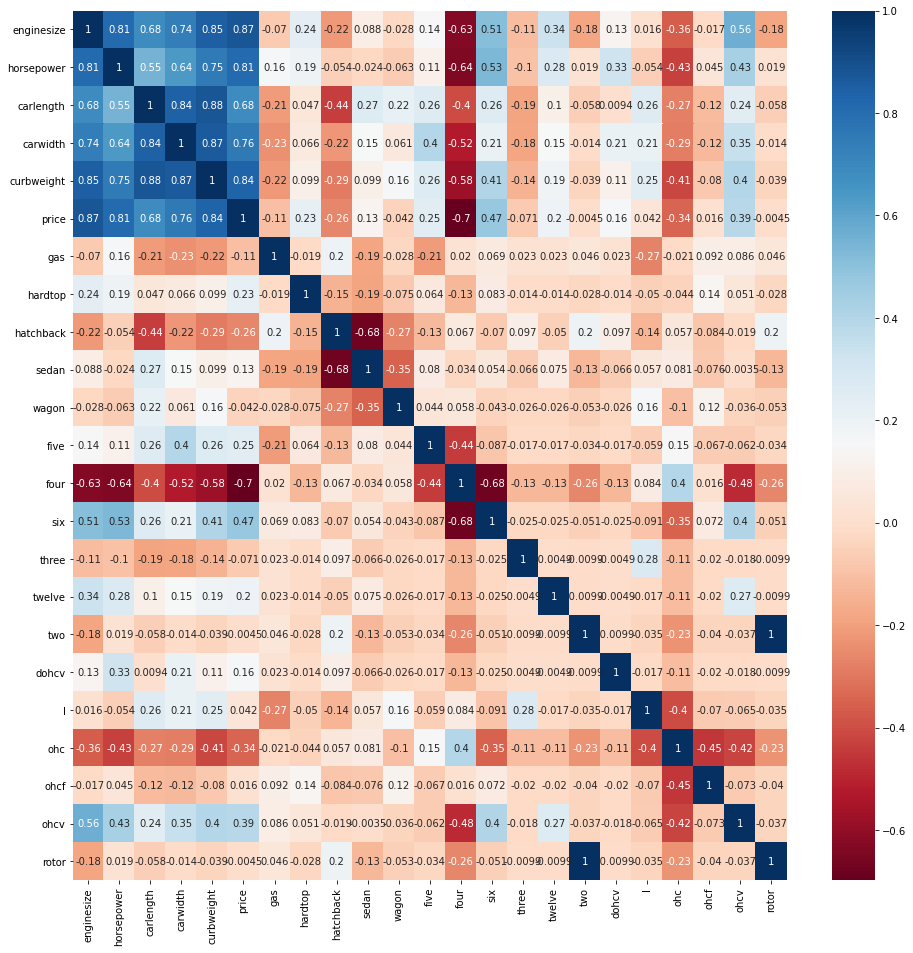

In [424]:
plt.figure(figsize=(16,16))
sns.heatmap(cars_df.corr(), cmap=plt.cm.RdBu, annot=True)

## Feature Selection

We are going to use the `Recursive Feature Elimination (RFE)` in order to rank the features to screen the features that are less useful for us.

In [426]:
from sklearn.model_selection import train_test_split
cars_train, cars_test = train_test_split(cars_df, train_size = 0.7, random_state = 100)

In [427]:
y_train = cars_train.pop('price')
X_train = cars_train

In [428]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr, 10)
rfe_clf = rfe.fit(X_train, y_train)

/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [444]:
fdf = pd.DataFrame({"column": X_train.columns, 'support': rfe.support_, 'rank': rfe.ranking_})
fdf = fdf[fdf.sort_values(['rank'])['rank'] == 1]
fdf

<ipython-input-444-4bbd53cb86bd>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fdf = fdf[fdf.sort_values(['rank'])['rank'] == 1]


,column,support,rank
0,enginesize,True,1
1,horsepower,True,1
3,carwidth,True,1
4,curbweight,True,1
10,five,True,1
11,four,True,1
12,six,True,1
14,twelve,True,1
16,dohcv,True,1
20,ohcv,True,1


## Train a Linear Regression Model

Using only the top 10 features that influence the car price:

In [449]:
fdf['column'].values

array(['enginesize', 'horsepower', 'carwidth', 'curbweight', 'five',
       'four', 'six', 'twelve', 'dohcv', 'ohcv'], dtype=object)

In [450]:
X_train = X_train[fdf['column'].values]

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Predicting

In [453]:
y_test = cars_test.pop('price')
X_test = cars_test[fdf['column'].values]

y_preds = lr.predict(X_test)

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

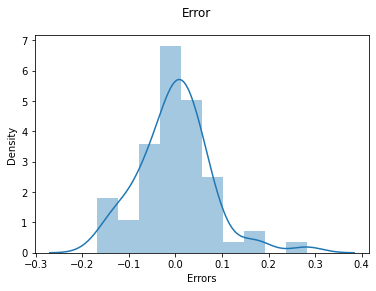

In [454]:
fig = plt.figure()
sns.distplot(y_test - y_preds)
fig.suptitle('Error')
plt.xlabel('Errors')

**Having almost normal error distribution gives us the assurance that the assumption of linear model is correct**

## Evaluating the model

In [455]:
from sklearn.metrics import r2_score

In [458]:
r2_score(y_test, y_preds)

0.8620330797160349

Without any adjustments we got r-squared of 0.86 which means that we can explain 86% of the variance data.

# Conslusion and Future Steps

### Conclusion
In this notebook we took the cars dataset and predicted the cars prices using features exploration and feature Selection. We performed first feature selection by ploting graphs to clearly see the features that matters, from the first selection we drawed 23 features.  
Using the `RFE`, feature ranking, we selected the first 10 features from the 23 we got earlier and trained the Linear Regression model based on those features.  

### Future Steps
We can go further into the dataset and drive new features or try to remove some of the features we got from the RFE. Ideas for improving the model:
<ol>
    <li>Use Feature Engineering to combine the <b>citympg</b> and <b>highwaympg</b> to get fuel economy feature.  </li>
    <li>Use <b>statsmodels</b> to get summary of the model in order to monitor the <b>R-squared</b>, <b>Adj R-squared</b> and <b>p-value</b></li>
</ol>  